<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/Homework_3/Intro_to_ML_HW3_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/diabetes.csv'
dataset = pd.DataFrame(pd.read_csv(url))
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Checking the dataset for missing data
dataset.isnull().sum()
dataset.isna().sum()

# Separating inputs from outputs
inputs = dataset.iloc[:,0:7].values
outputs = dataset.iloc[:,8].values

In [21]:
# Split the data into training and test data
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

In [22]:
# Input standardization
sc_inputs = StandardScaler()
inputs_train = sc_inputs.fit_transform(inputs_train)
inputs_test = sc_inputs.fit_transform(inputs_test)

In [23]:
classifier = LogisticRegression(random_state=0, class_weight='balanced')
classifier.fit(inputs_train, outputs_train)

LogisticRegression(class_weight='balanced', random_state=0)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       107
           1       0.61      0.87      0.72        47

    accuracy                           0.79       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.83      0.79      0.80       154



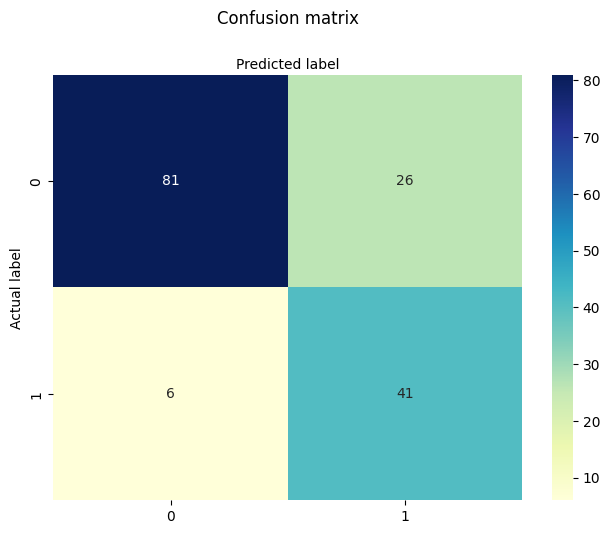

In [24]:
# Classifying data
Output_pred = classifier.predict(inputs_test)

cnf_matrix = confusion_matrix(outputs_test, Output_pred)

accuracy = metrics.accuracy_score(outputs_test, Output_pred)
precision = metrics.precision_score(outputs_test, Output_pred)
recall = metrics.recall_score(outputs_test, Output_pred)

# Confusion matrix heatmap

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
report = classification_report(outputs_test, Output_pred)
print(report)